In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
county_df = pd.read_excel("data/County_Statistics.xlsx")
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   County                           57 non-null     object 
 1   Emergency Visits / 100000        42 non-null     float64
 2   Hospitalizations / 100000        19 non-null     float64
 3   Energy Burden % of Income        57 non-null     object 
 4   Imperviousness                   57 non-null     object 
 5   Park within 1/2 Mile             57 non-null     object 
 6   Hospital Beds / 10000            57 non-null     object 
 7   Housing Built before 1980        57 non-null     object 
 8   Housing Insecurity               57 non-null     object 
 9   Lack of Reliable Transportation  57 non-null     object 
 10  % w/o Internet                   57 non-null     object 
 11  Utility Services Threat          57 non-null     object 
dtypes: float64(2), object(10

Missing values in Emergency visits and Hospitalizations. Let's drop hospitalizations since there are so many missing values. Only drop county data that have empty Emergency visit values.

#### Cleaning

In [3]:
#dropping hospitalization
county_df = county_df.drop('Hospitalizations / 100000', axis=1)
county_df = county_df.drop('County', axis=1)
#drop na to drop rows with empty values for emergency visits
#our target is emergency visits for this analysis

county_df = county_df.dropna()
county_df.head()


,Emergency Visits / 100000,Energy Burden % of Income,Imperviousness,Park within 1/2 Mile,Hospital Beds / 10000,Housing Built before 1980,Housing Insecurity,Lack of Reliable Transportation,% w/o Internet,Utility Services Threat
2,43.53,3.2%,2.0%,62.6%,22.42,52.83%,12.2%,8.5%,7.9%,6.9%
5,13.06,1.5%,15.1%,80.6%,14.55,55.52%,12.5%,8.2%,3.8%,6.3%
7,17.31,2.7%,1.3%,71.8%,9.94,45.23%,10.3%,7.1%,6.8%,5.6%
8,28.84,3.0%,2.5%,69.6%,18.85,50.92%,20.0%,13.0%,11.4%,10.3%
9,47.49,3.6%,1.0%,37.8%,16.27,58.14%,18.3%,12.1%,12.8%,9.5%


Need to convert all features into floats from % objects

In [ ]:
#remove all instances of '%'
county_df['Park within 1/2 Mile'] = county_df['Park within 1/2 Mile'].str.removesuffix('%')
county_df['Imperviousness'] = county_df['Imperviousness'].str.removesuffix('%')
county_df['Energy Burden % of Income'] = county_df['Energy Burden % of Income'].str.removesuffix('%')
county_df['Housing Built before 1980'] = county_df['Housing Built before 1980'].str.removesuffix('%')
county_df['Housing Insecurity'] = county_df['Housing Insecurity'].str.removesuffix('%')
county_df['Lack of Reliable Transportation'] = county_df['Lack of Reliable Transportation'].str.removesuffix('%')
county_df['% w/o Internet'] = county_df['% w/o Internet'].str.removesuffix('%')
county_df['Utility Services Threat'] = county_df['Utility Services Threat'].str.removesuffix('%')

#convert to float
county_df['Park within 1/2 Mile'] = county_df['Park within 1/2 Mile'].astype(float)
county_df['Imperviousness'] = county_df['Imperviousness'].astype(float)
county_df['Energy Burden % of Income'] = county_df['Energy Burden % of Income'].astype(float)
county_df['Hospital Beds / 10000'] = county_df['Hospital Beds / 10000'].astype(float)
county_df['Housing Built before 1980'] = county_df['Housing Built before 1980'].astype(float)
county_df['Housing Insecurity'] = county_df['Housing Insecurity'].astype(float)
county_df['Lack of Reliable Transportation'] = county_df['Lack of Reliable Transportation'].astype(float)
county_df['% w/o Internet'] = county_df['% w/o Internet'].astype(float)
county_df['Utility Services Threat'] = county_df['Utility Services Threat'].astype(float)


county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2 to 56
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Emergency Visits / 100000        42 non-null     float64
 1   Energy Burden % of Income        42 non-null     float64
 2   Imperviousness                   42 non-null     float64
 3   Park within 1/2 Mile             42 non-null     float64
 4   Hospital Beds / 10000            42 non-null     float64
 5   Housing Built before 1980        42 non-null     float64
 6   Housing Insecurity               42 non-null     float64
 7   Lack of Reliable Transportation  42 non-null     float64
 8   % w/o Internet                   42 non-null     float64
 9   Utility Services Threat          42 non-null     float64
dtypes: float64(10)
memory usage: 3.6 KB


In [5]:
county_df.describe()

,Emergency Visits / 100000,Energy Burden % of Income,Imperviousness,Park within 1/2 Mile,Hospital Beds / 10000,Housing Built before 1980,Housing Insecurity,Lack of Reliable Transportation,% w/o Internet,Utility Services Threat
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,23.615476,2.442857,6.226190,68.052381,19.227381,53.102381,14.857143,9.816667,7.602381,7.700000
std,19.532277,0.951287,10.971561,17.283056,7.682904,10.886241,3.986755,2.487522,2.819919,2.024364
min,2.890000,0.800000,0.400000,30.900000,3.020000,30.330000,7.900000,5.700000,3.600000,3.800000
25%,10.197500,1.650000,1.325000,56.625000,14.562500,47.200000,12.250000,8.225000,5.400000,6.500000
50%,20.850000,2.450000,2.500000,68.400000,17.975000,50.800000,15.000000,9.650000,7.150000,7.700000
75%,30.185000,3.150000,4.800000,81.725000,24.260000,59.127500,18.200000,11.850000,9.725000,9.050000
max,115.940000,4.600000,62.300000,100.000000,37.060000,79.400000,24.300000,15.600000,13.400000,12.600000


#### Test-train split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
county_train, county_test = train_test_split(
    county_df, test_size=0.2, random_state=216, shuffle=True
)

##### Exploratory Data Analysis

In [8]:
county_train.columns

Index(['Emergency Visits / 100000', 'Energy Burden % of Income',
       'Imperviousness', 'Park within 1/2 Mile', 'Hospital Beds / 10000',
       'Housing Built before 1980', 'Housing Insecurity',
       'Lack of Reliable Transportation', '% w/o Internet',
       'Utility Services Threat'],
      dtype='object')

In [9]:
features = county_train.columns[1:]

print(features)

Index(['Energy Burden % of Income', 'Imperviousness', 'Park within 1/2 Mile',
       'Hospital Beds / 10000', 'Housing Built before 1980',
       'Housing Insecurity', 'Lack of Reliable Transportation',
       '% w/o Internet', 'Utility Services Threat'],
      dtype='object')


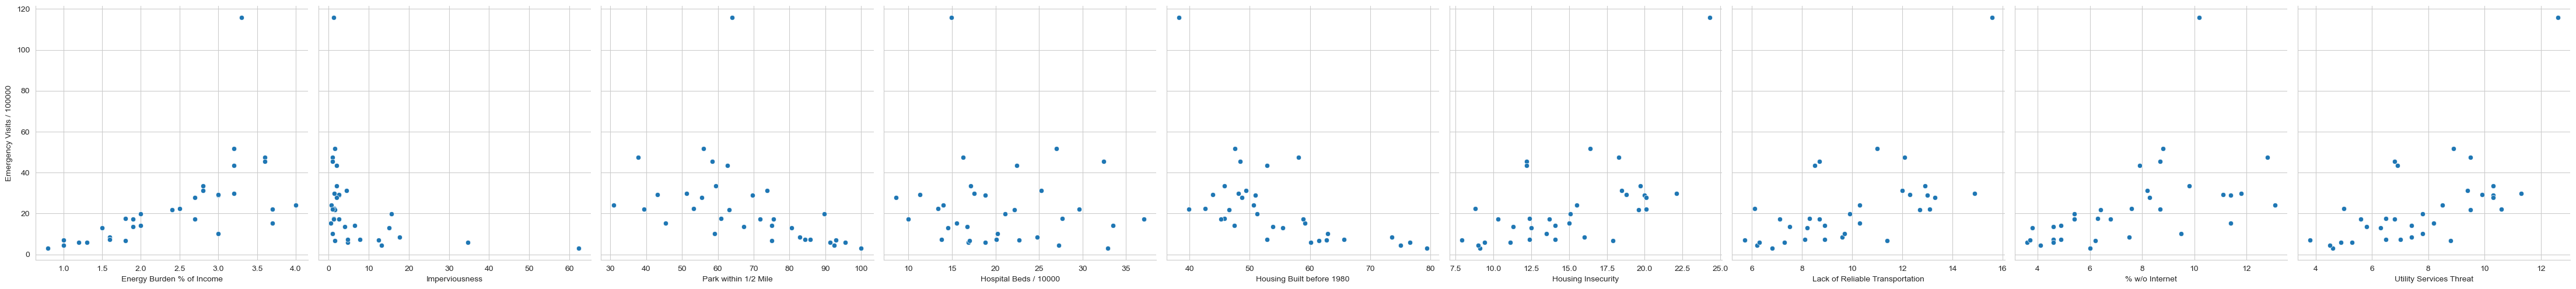

In [21]:
sns.pairplot(county_train,
    y_vars=["Emergency Visits / 100000"],
    x_vars=features,
    height=5,
    diag_kind=None,
)

#sns.pairplot(data = county_train,
#                x_vars = features,
#                y_vars = features,
#                hue = county_train.columns[0],
#                plot_kws = {'alpha':.6})



plt.show()

In [22]:
county_df[features].corrwith(county_df['Emergency Visits / 100000'])


Energy Burden % of Income          0.555806
Imperviousness                    -0.338620
Park within 1/2 Mile              -0.444207
Hospital Beds / 10000             -0.168445
Housing Built before 1980         -0.518500
Housing Insecurity                 0.537360
Lack of Reliable Transportation    0.562182
% w/o Internet                     0.495678
Utility Services Threat            0.593613
dtype: float64

#### feature importance from highest to lowest importance:
Utility Services Threat,

Lack of Reliable Transportation,

Energy Burden % of Income,

Housing Insecurity,

Housing Built before 1980,

% w/o Internet,

Park within 1/2 Mile,

Imperviousness,

Hospital Beds / 10000